LINEAR REGRESSION USING BOSTON DATASET

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Loading Dataset

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keysa()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [18]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [28]:
bos['MEDV']=boston.target

In [29]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Data Preprossesing

In [31]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Exploratory Data Analysis

C:\Users\sudee\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


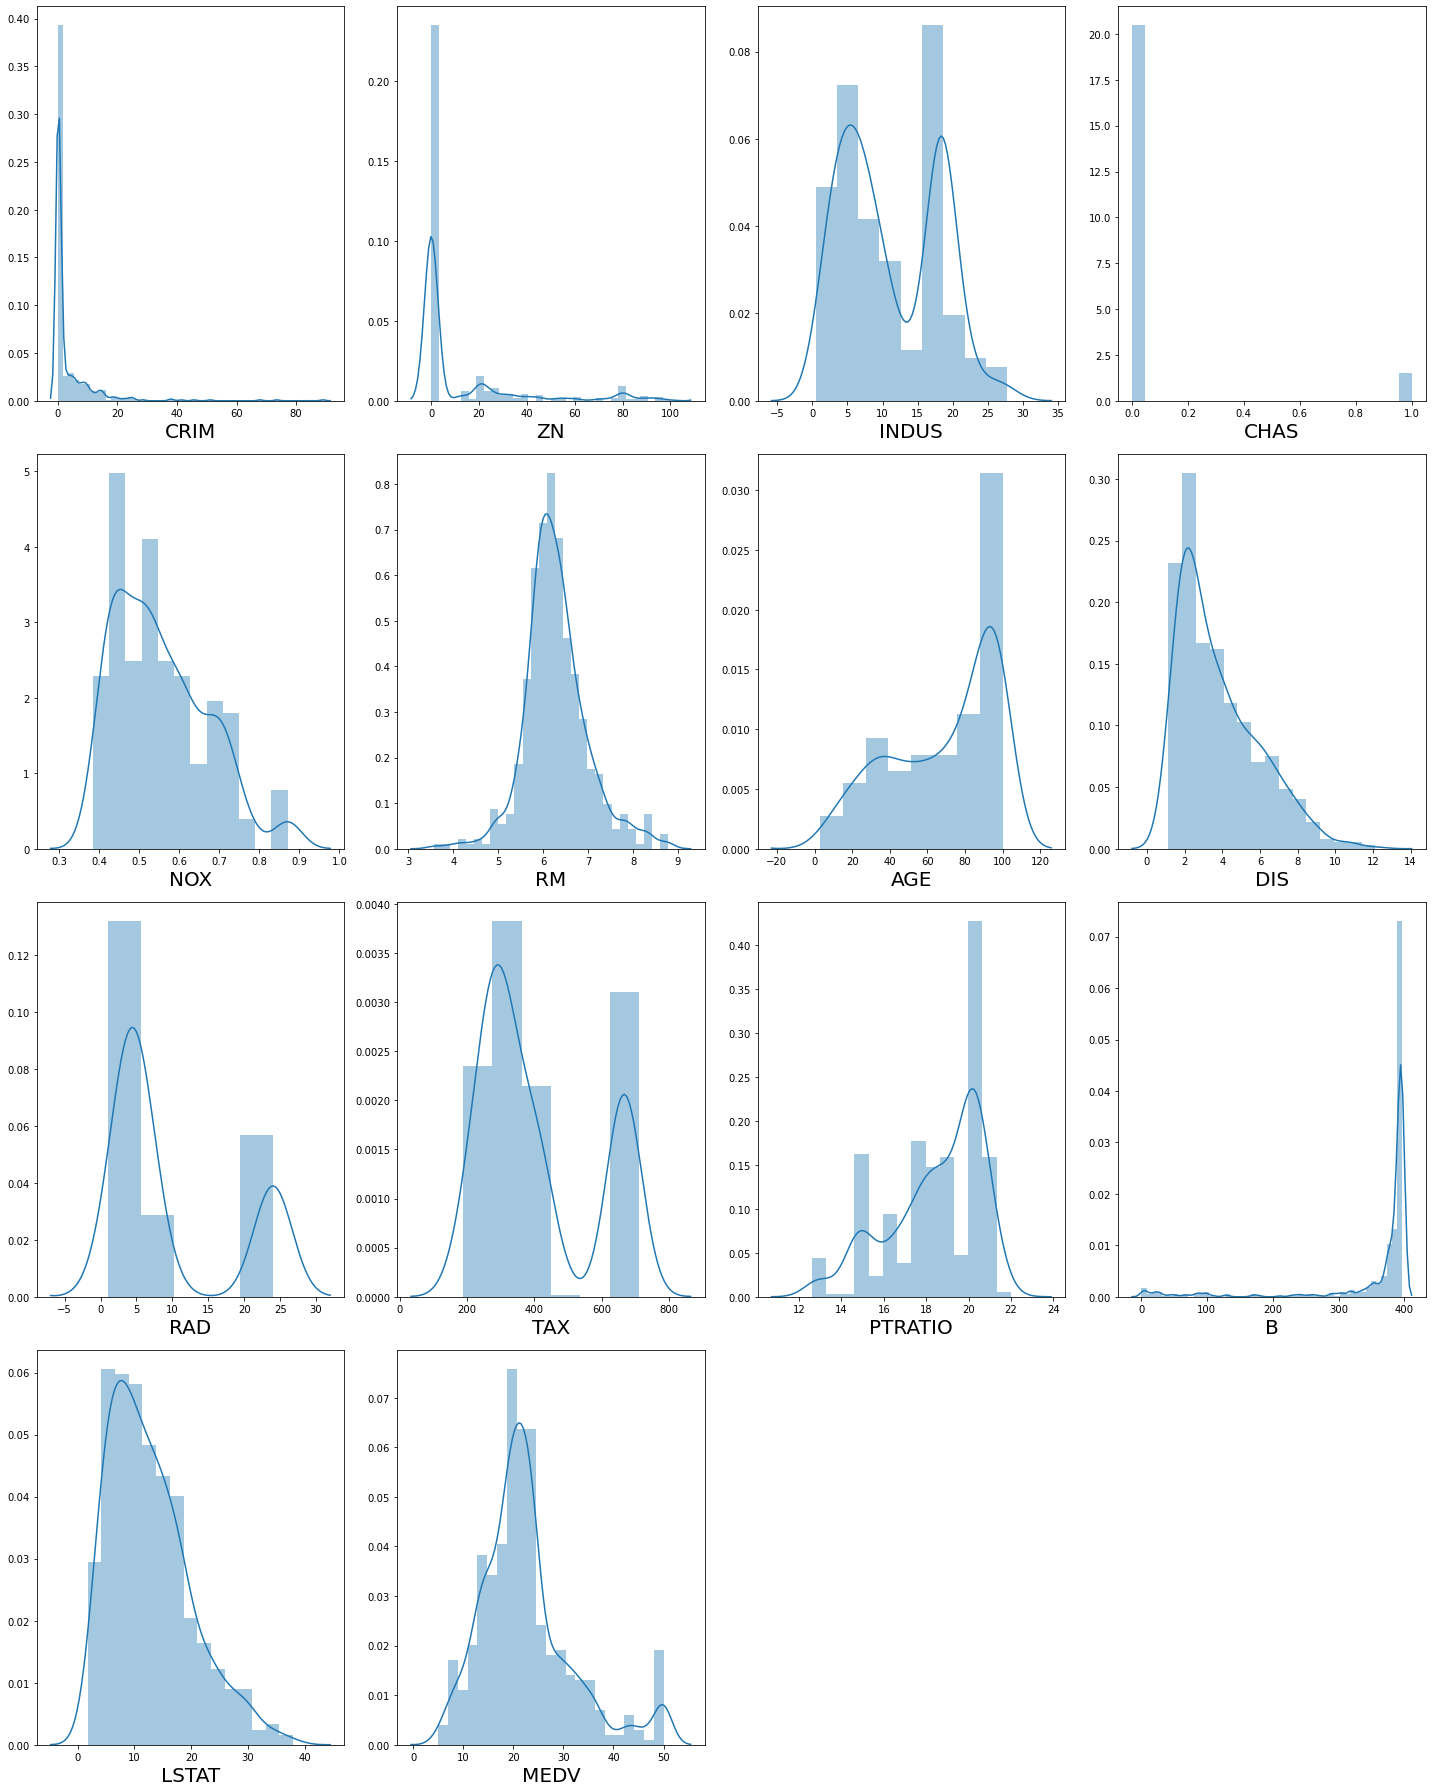

In [30]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber = 1
for column in bos:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [86]:
#correlation_matrix = bos.corr().round(2)
#annot = True, to print the values inside the square
#sns.heatmap(data = correlation_matrix, annot = True)

In [37]:
X = bos.drop(columns = ['MEDV'])
y = bos['MEDV']

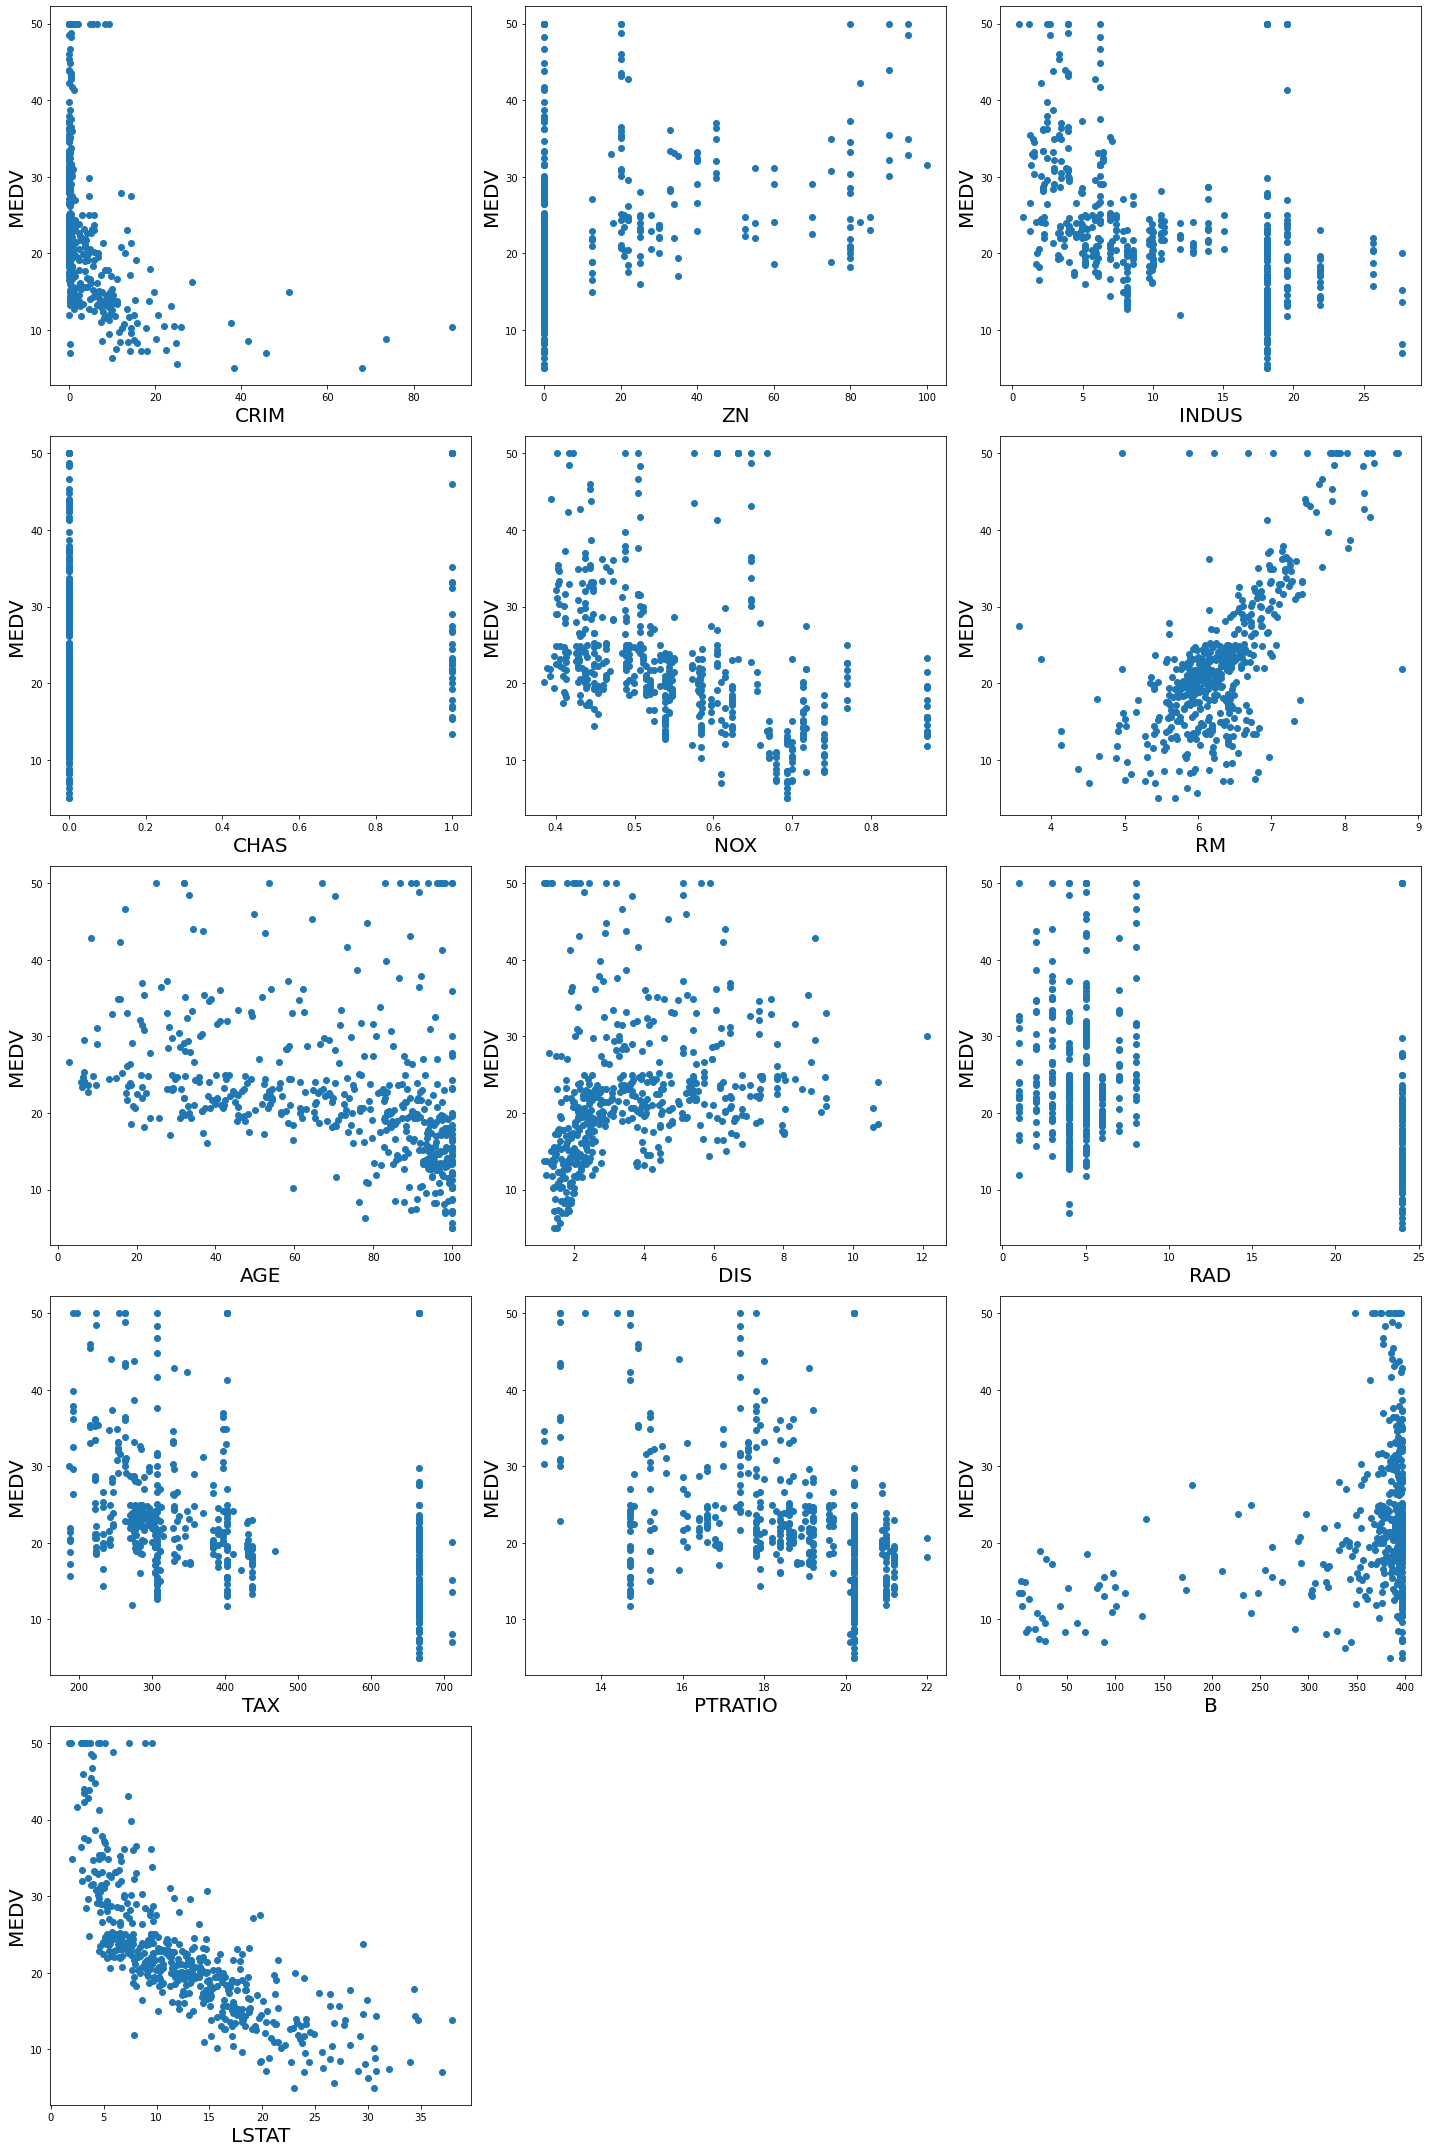

In [44]:
plt.figure(figsize = (20,30),facecolor = 'White')
plotnumber = 1

for column in X:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV', fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [48]:
X = pd.DataFrame(bos[['LSTAT','RM']])
Y = bos['MEDV']

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
variables = X_scaled

In [55]:
vif = pd.DataFrame()

In [56]:
vif['VIF']=[variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

In [57]:
vif['Features'] = X.columns

In [58]:
vif

,VIF,Features
0,1.60452,LSTAT
1,1.60452,RM


Split data into train and test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 355)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 2)
(127, 2)
(379,)
(127,)


Create regression model

In [65]:
from sklearn.linear_model import LinearRegression

In [67]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [73]:
regression.score(x_train, y_train)

0.6289775425893549

In [74]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [75]:
adj_r2(x_train,y_train)

0.6270040188797239

In [76]:
adj_r2(x_test,y_test)

0.6538841949794183

Check for overfiting

In [77]:
from sklearn.linear_model import LassoCV

In [78]:
lassCV = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)

In [79]:
lassCV.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [80]:
alpha = lassCV.alpha_

In [81]:
alpha

0.0008381842533253742

In [83]:
lasso_reg = LassoCV(alpha)

C:\Users\sudee\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass eps=0.0008381842533253742 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [84]:
lasso_reg.fit(x_train, y_train)

LassoCV(eps=0.0008381842533253742)

In [85]:
lasso_reg.score(x_test,y_test)

0.6592374977576592